In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/NIDHI/

Mounted at /content/drive
/content/drive/MyDrive/NIDHI


In [2]:
!nvidia-smi

Wed Jul  5 14:15:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/NIDHI


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
# !mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="5zpTfgCyK9ZorPN4aOGf")
# project = rf.workspace("denise-manalo").project("skin-disease-9nagn")
# dataset = project.version(1).download("folder")

/content/drive/MyDrive/NIDHI/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=ea3ad158842d30b6b817e4bd876784602f3a24d2a4e6b4ae08ea115b293c5b2f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  

In [7]:
model = YOLO("yolov8n-cls.pt")


In [8]:
%cd {HOME}

# !yolo task=classify mode=train model=yolov8n-cls.pt data="/content/drive/MyDrive/NIDHI/datasets/Skin" epochs=20 imgsz=128


/content/drive/MyDrive/NIDHI


In [9]:
!ls -la {HOME}/runs/classify/train8/

total 4
drwx------ 2 root root 4096 Jun 27 06:04 weights


In [10]:
!cat {HOME}/runs/classify/train8/results.csv | head -10

cat: /content/drive/MyDrive/NIDHI/runs/classify/train8/results.csv: No such file or directory


**Validation**

In [11]:

%cd {HOME}

!yolo task=classify mode=val model=/content/drive/MyDrive/NIDHI/runs/classify/train3/weights/best.pt data="/content/drive/MyDrive/NIDHI/datasets/Skin"

/content/drive/MyDrive/NIDHI
2023-07-05 14:16:08.464927: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 14:16:09.275346: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(

**Inference with Custom Model**

In [12]:

%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train3/weights/best.pt conf=0.25 source="/content/datasets/Skin-Disease-1/test/Warts"


/content/drive/MyDrive/NIDHI
2023-07-05 14:16:50.819955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 14:16:51.712390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in dec

In [13]:
model = YOLO('/content/drive/MyDrive/NIDHI/runs/classify/train3/weights/best.pt')

In [14]:
model.predict("/content/drive/MyDrive/NIDHI/datasets/Skin/test/Warts", save=True, imgsz=320, conf=0.5)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
Results saved to runs/classify/predict2


[tensor([0.17272, 0.16815, 0.28273, 0.18670, 0.18970], device='cuda:0'),
 tensor([0.18078, 0.17464, 0.25487, 0.19422, 0.19549], device='cuda:0'),
 tensor([0.20116, 0.21668, 0.17679, 0.20243, 0.20294], device='cuda:0'),
 tensor([0.21839, 0.18781, 0.17117, 0.22000, 0.20264], device='cuda:0'),
 tensor([0.20983, 0.22080, 0.17187, 0.20289, 0.19461], device='cuda:0'),
 tensor([0.19732, 0.24051, 0.17607, 0.18687, 0.19924], device='cuda:0'),
 tensor([0.19488, 0.17307, 0.23200, 0.20487, 0.19518], device='cuda:0'),
 tensor([0.19715, 0.22835, 0.17642, 0.20159, 0.19649], device='cuda:0'),
 tensor([0.17055, 0.32486, 0.16070, 0.16755, 0.17634], device='cuda:0'),
 tensor([0.18025, 0.26000, 0.17568, 0.18493, 0.19915], device='cuda:0'),
 tensor([0.16981, 0.31608, 0.16021, 0.17247, 0.18142], device='cuda:0'),
 tensor([0.17708, 0.31017, 0.16141, 0.17268, 0.17866], device='cuda:0'),
 tensor([0.17453, 0.27422, 0.16949, 0.18157, 0.20019], device='cuda:0'),
 tensor([0.26179, 0.19927, 0.16825, 0.18618, 0.1845

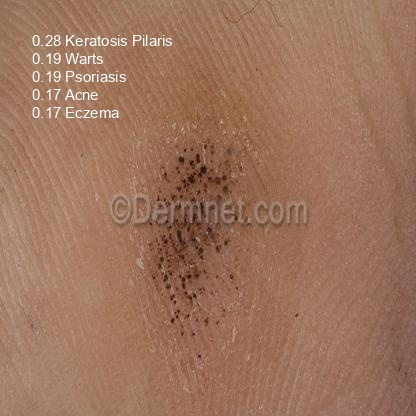

In [15]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/NIDHI/runs/classify/predict/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [17]:
!pip install ttach

In [18]:
import time
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import numpy as np
import sys

In [29]:
model = YOLO('/content/drive/MyDrive/NIDHI/runs/classify/train3/weights/best.pt')
target_layers = [model.model.model[-2]]
def predict_heat(source):
    try:
        img = source
        rgb_img = source.copy()
        img = np.float32(img) / 255
        cam = EigenCAM(model, target_layers, task='cls')
        grayscale_cam = cam(rgb_img)[0, :, :]
        cam_image = show_cam_on_image(img, grayscale_cam)  # , use_rgb=True)
        alpha = 0.8  # Weight for image1
        beta = 0.3  # Weight for image2
        cam_image1 = predict_pose(source)
        cam_image_f = cv2.addWeighted(cam_image1, alpha, cam_image, beta, 0)
        return cam_image_f
    except Exception as e:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print(exc_type, fname, exc_tb.tb_lineno)
        return source


In [30]:
def predict_pose(source):
    try:
        start_time = time.time()
        results = model(source, boxes=True, conf=0.10, iou=0.8)#, save=True)  # ,boxes=False,show=True)#,save=True)
        # print(results)
        # for result in results:
        #     res_plotted = result.plot()
        return source
    except Exception as e:
        print("LOLOL")
        print(e)
        return source

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs


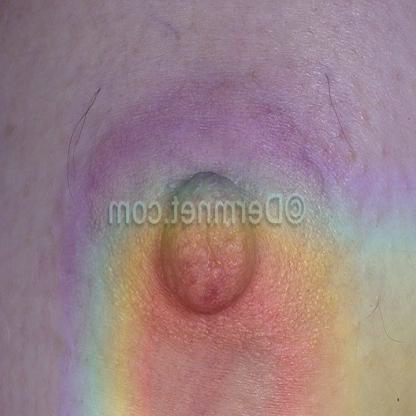

In [31]:
# import os

# dir_list = os.listdir("images")
# for fil in dir_list:
#     print(fil)
#     cv2.imwrite("result/" + fil, predict_heat(cv2.imread("images/" + fil)))
#     break
from google.colab.patches import cv2_imshow
import cv2
cv2_imshow(predict_heat(cv2.imread("/content/drive/MyDrive/NIDHI/datasets/Skin/train/Acne/Sebaceous-glands-Areola-1_jpg.rf.2496337a23044bb912a70e7b209258a0.jpg")))